Regional Well Drilling Data

#The goal of the project is to select the best region to build new oil wells in to help the company obtain the highest revenues.  We need to find what the minimum threshold is for profits of digging the wells as well.  In the end we need to find the best 200 wells to get at given it'll cost 100 million to produce 200 wells, while each barrel of oil will give us 4.50 in revenue.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_paths = {
    "Region 0": "/datasets/geo_data_0.csv",
    "Region 1": "/datasets/geo_data_1.csv",
    "Region 2": "/datasets/geo_data_2.csv"
}

data = {region: pd.read_csv(path) for region, path in file_paths.items()}

for region, df in data.items():
    duplicate_count = df.duplicated().sum()  # Count duplicate rows
    print(f"Duplicates in {region}: {duplicate_count}")

    if duplicate_count > 0:
        print(df[df.duplicated()].head()) 
        
for region, df in data.items():
    print(f"Data for {region}:\n")
    print(df.info())
    print(df.head(), "\n")

Duplicates in Region 0: 0
Duplicates in Region 1: 0
Duplicates in Region 2: 0
Data for Region 0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 

Data for Region 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Cou

In [2]:
BUDGET = 100000000
OIL_PRICE_PER_BARREL = 4.5
WELLS_SELECTED = 200
STUDY_WELLS = 500
BARREL_UNIT_REVENUE = 4500

cost_per_well = BUDGET / WELLS_SELECTED

#CONSTANTS

I started out by putting all the data in a dataframe then creating the regions filter to view the information by region.  Next I will split the data into training and validation sets for each run to run linear regression on them. From there I run predictions based on the model for each region.  Based on the model I can get the average predicted reserves for the region and also the RMSE.

Generating plots for Region 0...



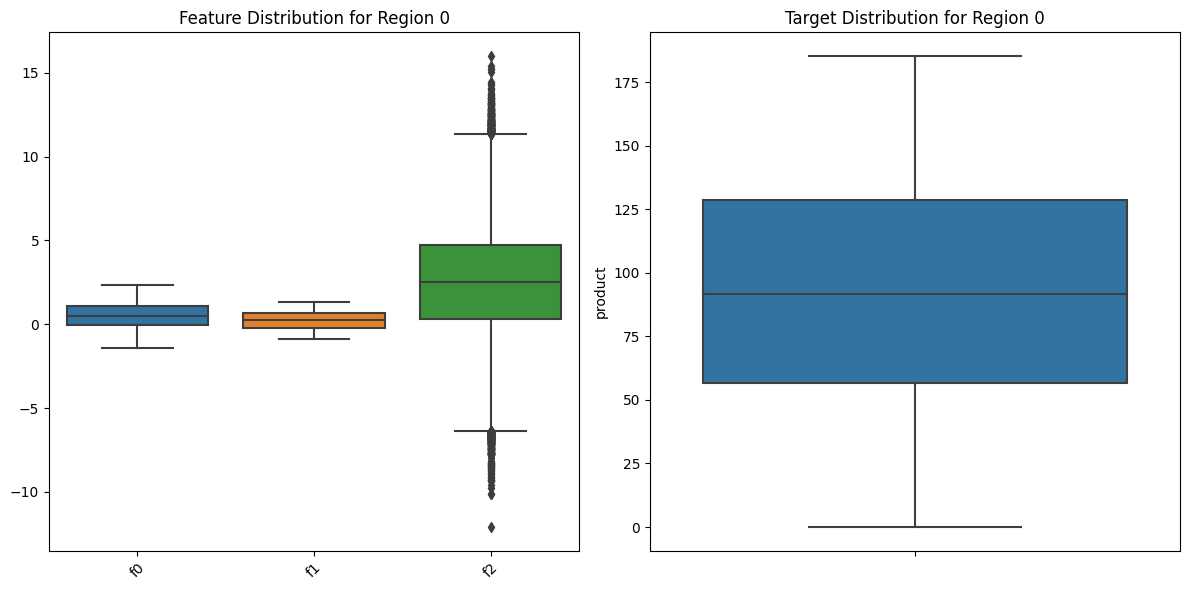

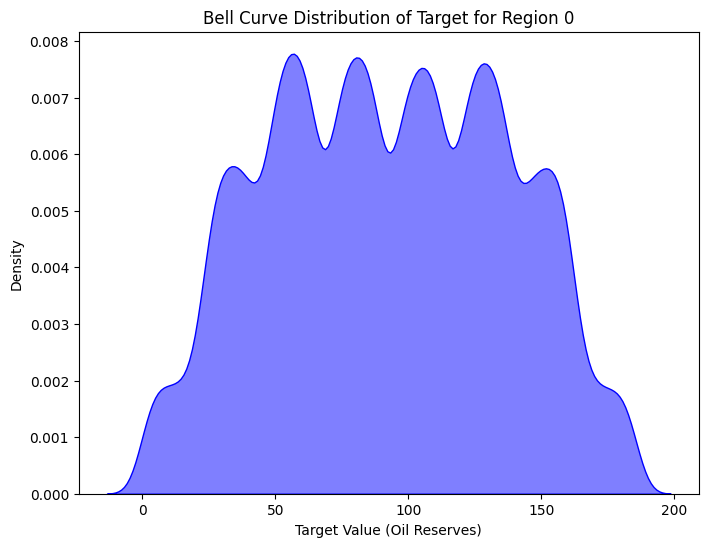

Generating plots for Region 1...



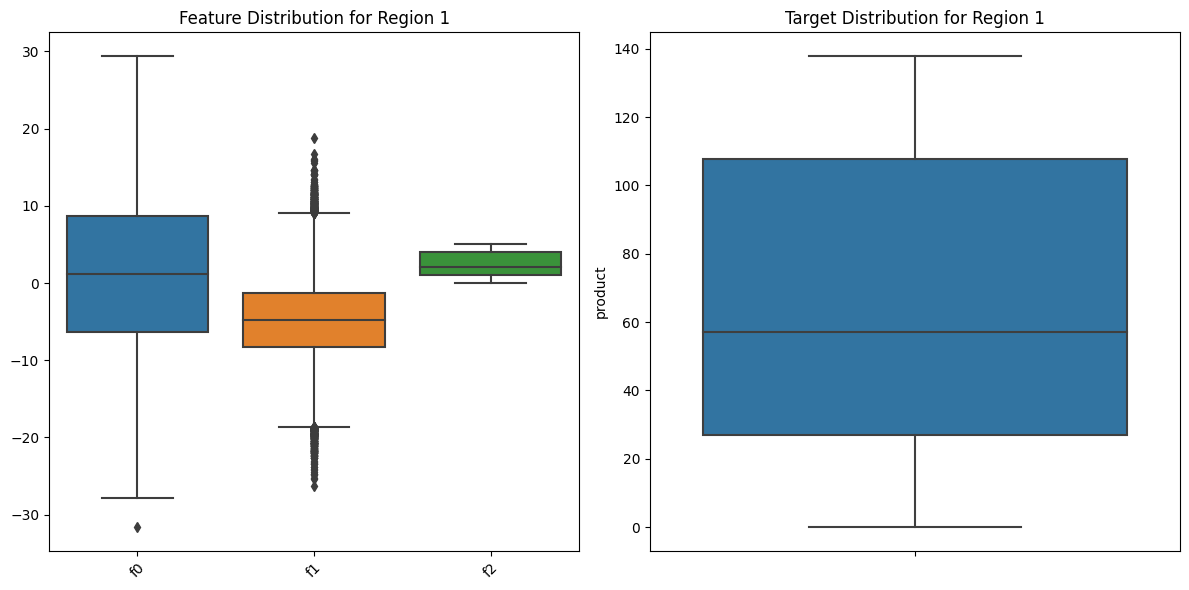

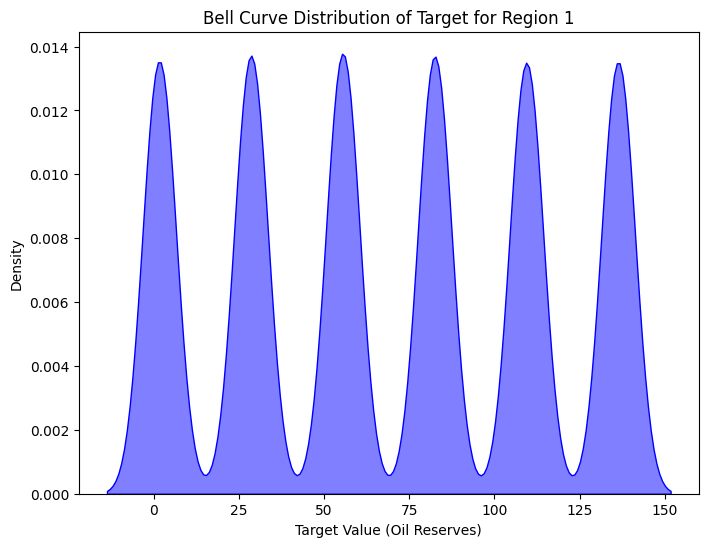

Generating plots for Region 2...



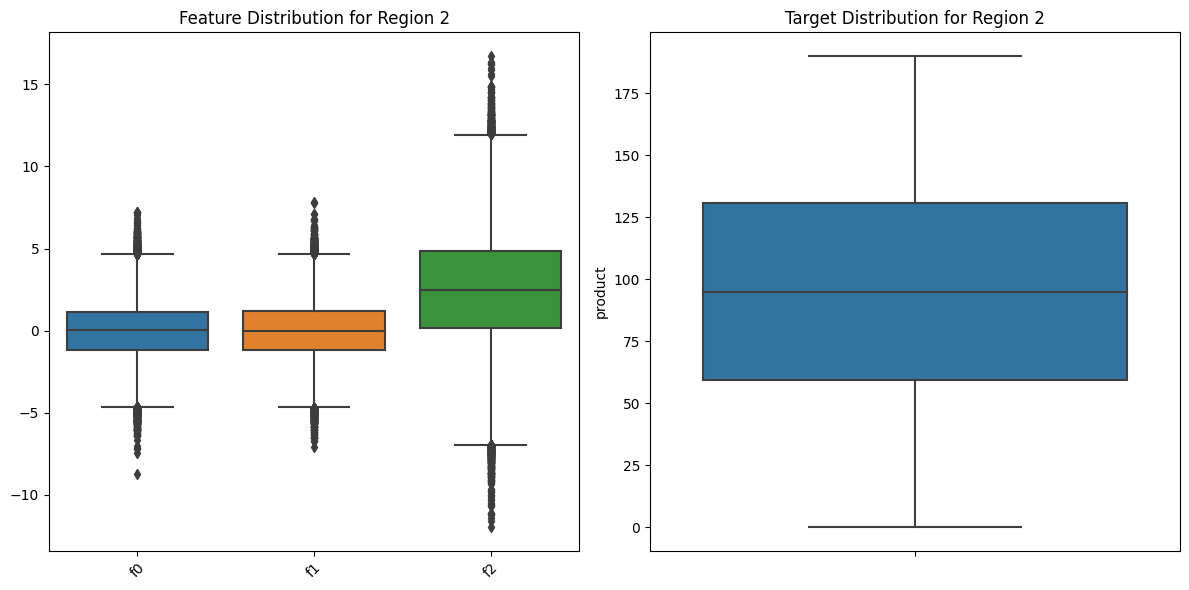

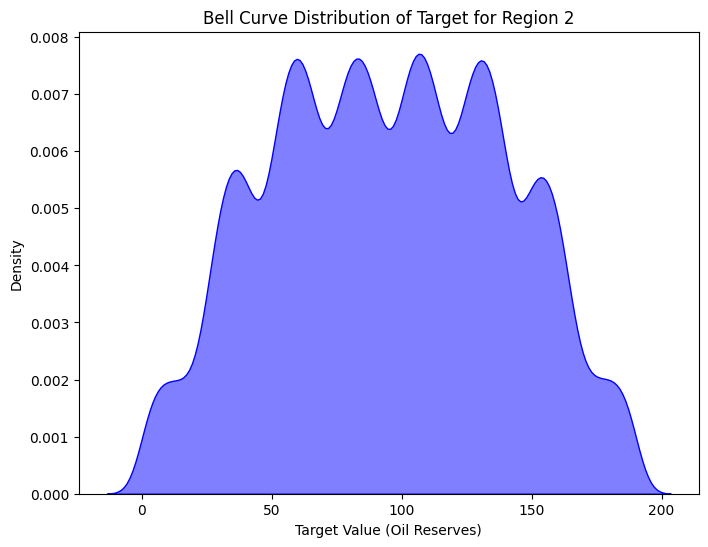

In [3]:
#Need to add box/whisker and distribtion graphs here and analyze them
def plot_boxplots(region, df):
    plt.figure(figsize=(12, 6))
    numeric_features = df.select_dtypes(include=[np.number]).drop(columns=['product']).columns
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[numeric_features])
    plt.title(f'Feature Distribution for {region}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['product'])
    plt.title(f'Target Distribution for {region}')

    plt.tight_layout()
    plt.show()
    
def plot_bell_curve(region, df):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df['product'], fill=True, color='blue', alpha=0.5)
    plt.title(f'Bell Curve Distribution of Target for {region}')
    plt.xlabel('Target Value (Oil Reserves)')
    plt.ylabel('Density')
    plt.show()

for region, df in data.items():
    print(f"Generating plots for {region}...\n")
    plot_boxplots(region, df)
    plot_bell_curve(region, df)

Judging from the distribution data it seems Region 0 and Region 2 are fairly similar in their distributions for the target.  For the features they are fairly similar as well with F2 being more dispersed than features F1 and F0 for both of them.  For region 0 and region 2 the distribution seems to be more heavily concentraded in the middle with large swings at the top.  The distribution curve for Region 1 goes up and down drastically and consistently through all the target data.  Judging from this data I would expect region 1 to be more volatile and inconsistent while Region 0 and Region 2 to be more predictable but have a higher dispersion of numbers way on the outsides.

In [4]:
def train_and_evaluate(region, df):
    print(f"Processing {region}...\n")
    features = df.drop(columns=['id', 'product'])
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=42
    )

    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predictions_valid = model.predict(features_valid)
    
    results = pd.DataFrame({
        'Actual': target_valid.values,
        'Predicted': predictions_valid
    })

    mse = mean_squared_error(target_valid, predictions_valid)
    rmse = np.sqrt(mse)

    print(f"Average Predicted Reserves for {region}: {predictions_valid.mean():.2f} thousand barrels")
    print(f"RMSE for {region}: {rmse:.2f}\n")
    
    return model, results, rmse

models = {}
results = {}
rmse_scores = {}

for region, df in data.items():
    model, result, rmse = train_and_evaluate(region, df)
    models[region] = model
    results[region] = result
    rmse_scores[region] = rmse

Processing Region 0...

Average Predicted Reserves for Region 0: 92.40 thousand barrels
RMSE for Region 0: 37.76

Processing Region 1...

Average Predicted Reserves for Region 1: 68.71 thousand barrels
RMSE for Region 1: 0.89

Processing Region 2...

Average Predicted Reserves for Region 2: 94.77 thousand barrels
RMSE for Region 2: 40.15



#Based on my findings Region 0 and Region 2 have the highest average predicted oil reserves at 92.40 and 94.77, respectively.  The RMSE for the regions is also the highest with 37.76 for Region 0 and 40.15 for Region 2.  Given these have the highest values but also the highest amount of dispersion means the model does not predict as well for the regions.    The predicted vales seem to be far off the actual values compared to Region 1.  But Region 1's range was not as large as the other two regions so this makes sense.

#Next I am going to prepare for the profit calculation by storing the key varaibales and calculating the volume of reserves sufficient for developing new wells without the business sustaining losses. 

In [5]:
min_oil_volume = cost_per_well / BARREL_UNIT_REVENUE
print(f"Minimum Oil Volume Needed per Well: {min_oil_volume:.2f} thousand barrels")

for region, result in results.items():
    avg_reserves = result["Actual"].mean()
    print(f"Average Reserves for {region}: {avg_reserves:.2f} thousand barrels")

Minimum Oil Volume Needed per Well: 111.11 thousand barrels
Average Reserves for Region 0: 92.33 thousand barrels
Average Reserves for Region 1: 68.73 thousand barrels
Average Reserves for Region 2: 95.15 thousand barrels


Based off a budget of 100,000,000 and a per barrel revenue of $4,500 we would need to drill on 200 wells with an average barrels of 111.11 (in thousands).  Meaning we would need over 22,222 barrels of oil reserves from our wells to be profitable from the new drilling.  Based off the models for our region averages Region 0 and Region 2 would be the closest to that amount but would still be an average of 18.78 and 15.96 (in thousands) barrels off on each well to be deemed profitable.  

#Next I am going to prepare for the profit calculation by storing the key varaibales and calculating the volume of reserves sufficient for developing new wells without the business sustaining losses. 

In [6]:
def calculate_profit(targets, predictions):
    """Calculate profit based on the top 200 predicted wells."""
    selected = predictions.sort_values(ascending=False)[:WELLS_SELECTED]
    selected_reserves = targets[selected.index]
    revenue = selected_reserves.sum() * BARREL_UNIT_REVENUE
    return revenue - BUDGET

profits = {}
for region, result in results.items():
    profits[region] = calculate_profit(result['Actual'], result['Predicted'])
    print(f"Estimated Profit for {region}: ${profits[region]:,.2f}")

Estimated Profit for Region 0: $33,591,411.14
Estimated Profit for Region 1: $24,150,866.97
Estimated Profit for Region 2: $25,985,717.59


#Based off selecting the wells from each region with the highest values each region would have a revenue over $24 million.  While Region 0 would be the region with the highest profit at almost 33.6 million.  Based on this I can assume Region 0 is the region with the most wells with the largest volume.  Region 2 had a higher average volume but could have less large values at the top.  I would select Region 0 based off this because it has the largest estimated profit.

In [7]:
def bootstrap_profit(targets, predictions, n_samples=1000):
    """Perform bootstrapping to assess profit variability."""
    np.random.seed(42)
    values = []
    
    for _ in range(n_samples):
        sample_indices = np.random.choice(predictions.index, size=STUDY_WELLS, replace=True)
        sample_profit = calculate_profit(targets, predictions.loc[sample_indices])
        values.append(sample_profit)
    
    values = np.array(values)
    
    mean_profit = values.mean()
    lower_bound, upper_bound = np.percentile(values, [2.5, 97.5])
    loss_risk = (values < 0).mean() * 100  # Percentage of times profit < 0
    
    return mean_profit, lower_bound, upper_bound, loss_risk

bootstrap_results = {}
for region, result in results.items():
    mean_profit, lower, upper, risk = bootstrap_profit(result['Actual'], result['Predicted'])
    bootstrap_results[region] = (mean_profit, lower, upper, risk)
    print(f"\n{region} Profit Analysis:")
    print(f"  - Average Profit: ${mean_profit:,.2f}")
    print(f"  - 95% Confidence Interval: (${lower:,.2f}, ${upper:,.2f})")
    print(f"  - Risk of Loss: {risk:.2f}%")

selected_region = None
max_profit = -float('inf')

for region, (mean_profit, lower, upper, risk) in bootstrap_results.items():
    if risk < 2.5 and mean_profit > max_profit:
        max_profit = mean_profit
        selected_region = region

print(f"\nBest Region for Development: {selected_region} with Estimated Profit of ${max_profit:,.2f}")


Region 0 Profit Analysis:
  - Average Profit: $3,995,754.78
  - 95% Confidence Interval: ($-1,104,678.95, $8,974,603.28)
  - Risk of Loss: 6.00%

Region 1 Profit Analysis:
  - Average Profit: $4,520,488.91
  - 95% Confidence Interval: ($616,844.80, $8,453,401.78)
  - Risk of Loss: 1.50%

Region 2 Profit Analysis:
  - Average Profit: $3,750,099.03
  - 95% Confidence Interval: ($-1,447,667.27, $8,883,904.04)
  - Risk of Loss: 8.00%

Best Region for Development: Region 1 with Estimated Profit of $4,520,488.91


#Based on the data from the regions it was actually the opposite of what I predicted earlier.  The variance was larger for region 0 and region 2 causing its confidence interval to be larger han Region 1.  Region 0 and Region did have a higher upper value for the confidence interval though which means more upside, but like anything more upside just means more downside.  Region 0 and Region 2 had a 6% and 8% chance of loss while Region 1 was lower with a 1.5% chance of loss.  Based of this analysis I would suggest Region 1 as it is projected to be the region with the best development for estimated profit.  While Region 0 and Region 2 have higher chances for upside Region 1 would be the most consistent option and would have the best odds to be profitable.